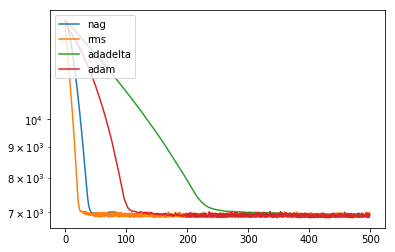

Error rate:
nag: 0.1972851790430563
rmsProp: 0.20152324795774215
adaDelta: 0.1981450770837172
adam: 0.20926233032369018


In [1]:
'''SVM with four gradient descent methods'''
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sd
from sklearn.model_selection import train_test_split
import random
import math

def getGradient(w,x,y):
    '''Calculate batch gradient'''
    m = x.shape[0]
    n = x.shape[1]
    gradient = np.zeros((n,1))
    for k in range(batch):
        i = int(random.uniform(0,m-1))
        gradient += w
        if (1 - (y[i]*np.dot(w.T,x[i].T))[0])>0:
            gradient += 0-C*y[i]*(x[i].reshape((n,1)))
    return gradient/batch

def nag(w,x,y,vt):
    m = x.shape[0]
    n = x.shape[1]
    w = w - vt*gamma
    gradient = getGradient(w,x,y)
    vt = gamma*vt + alpha*gradient
    return vt

def RMSProp(w,x,y,s):
    g = getGradient(w,x,y)
    n = g.shape[0]
    tempg = g*g
    s = gamma*s +(1-gamma)*tempg
    for i in range(n):
        g[i][0] = alpha/math.sqrt(s[i][0]+epsl)*g[i][0]
    return g

def adaDelta(w,x,y,s,dx):
    g = getGradient(w,x,y)
    n = g.shape[0]
    tempg = g*g
    s = gamma*s +(1-gamma)*tempg
    for i in range(n):
        g[i][0] = math.sqrt(dx[i][0]+epsl)/math.sqrt(s[i][0]+epsl)*g[i][0]
    dx = gamma*dx +(1-gamma)*tempg
    return g

def adam(w,x,y,t,v,s):
    t = t+1
    g = getGradient(w,x,y)
    n = g.shape[0]
    v = gamma1*v+(1-gamma1)*g
    tempg = g*g
    s = gamma2*s+(1-gamma2)*tempg
    if t<200:
        tempv = v/(1-pow(gamma1,t))
        temps = s/(1-pow(gamma2,t)) + epsl
    else:
        tempv = v
        temps = s + epsl
    for i in range(n):
        temps[i][0] = math.sqrt(temps[i][0])
    g = alpha * tempv / temps
    return g

def getLoss(w,x,y):
    '''Calculate value of loss function'''
    loss = 0
    for i in range(x.shape[0]):
        loss += max(0,1 - (y[i]*np.dot(w.T,x[i].T)[0]))
    return 0.5*(np.dot(w.T,w)[0][0])+C*loss

def getError(w,x,y):
    '''Calculate the error rate of prediction'''
    error = 0
    m = x.shape[0]
    for i in range(m):
        if x[i].dot(w)[0]>-0.85:
            predict = 1
        else: predict = -1
        if predict != y[i]: error += 1
    return error/m
#Read and spilt data
data_train = sd.load_svmlight_file('a9a')
data_test = sd.load_svmlight_file('a9a.t')
X_train,y_train = data_train[0],data_train[1]
X_test,y_test = data_test[0],data_test[1]
appendTrain = np.ones((X_train.shape[0],1))
appendTest = np.ones((X_test.shape[0],1))
X_train = np.column_stack((appendTrain,X_train.toarray()))
X_test = np.column_stack((appendTest,X_test.toarray()))

#Initialize parameters
n = X_train.shape[1]
w_nag = np.zeros((n,1))
w_sgd = np.zeros((n,1))
w_rms = np.zeros((n,1))
w_adad = np.zeros((n,1))
w_adam = np.zeros((n,1))
vt = np.zeros((n,1))
gamma = 0.9
gamma1 = 0.9
gamma2 = 0.999
epsl = 0.00000001

s_rms = np.zeros((n,1))

s_adad = np.zeros((n,1))
dx = np.zeros((n,1))

v = np.zeros((n,1))
s_adam = np.zeros((n,1))

#List of loss function
algos = [getGradient,nag,RMSProp,adaDelta,adam]
sgdLossList = []
nagLossList = []
rmsLossList = []
adadLossList = []
adamLossList = []
alpha = 0.001
C = 0.9
times = 500
batch = 1000
for i in range(times):
    vt = nag(w_nag, X_train, y_train, vt)
    w_nag = w_nag - vt
    
    g_rms = RMSProp(w_rms, X_train, y_train, s_rms)
    w_rms = w_rms - g_rms
    
    g_adad = adaDelta(w_adad, X_train, y_train, s_adad, dx)
    w_adad = w_adad - g_adad
    
    g_adam = adam(w_adam, X_train, y_train, i, v, s_adam)
    w_adam = w_adam - g_adam

    nagLossList.append(getLoss(w_nag,X_test,y_test))
    rmsLossList.append(getLoss(w_rms,X_test,y_test))
    adadLossList.append(getLoss(w_adad,X_test,y_test))
    adamLossList.append(getLoss(w_adam,X_test,y_test))
time = np.arange(times)
#Draw the curves
plt.plot(time, nagLossList,label='nag')
plt.plot(time, rmsLossList,label='rms')
plt.plot(time, adadLossList,label='adadelta')
plt.plot(time, adamLossList,label='adam')
plt.legend(loc='upper left')
plt.yscale('log')
plt.show()

#Calculate error rate
print('Error rate:')
print('nag:', getError(w_nag,X_test,y_test))
print('rmsProp:',getError(w_rms,X_test,y_test))
print('adaDelta:',getError(w_adad,X_test,y_test))
print('adam:',getError(w_adam,X_test,y_test))